In [6]:
using StatsBase

In [7]:
N=100
a=1
b=1000
times=collect(1:1000)
S(L)= N*log(N)-((L-b.*N)./(a-b)).*log((L-b.*N)./(a-b))-((L-a.*N)./(b-a)).*log((L-a.*N)./(b-a))

S (generic function with 1 method)

# Spring length under flipping dynamics

Consider the following dynamics: 
In each times step, one molecule is chosen at random and flipped to the other configurational state, (|) to (--) or (--) to (|). 

Starting with all molecules in position (|) (initial condition ones(Int,N) ) or (--) (initial condition zeros(Int,N) ), how does the length eveolve as a function of time? 

In [10]:
system=ones(Int,N)
len(x)=[counts(x,0:0)*a+counts(x,1:1)*b][1]
results=[len(system)]
for i in times
    s=rand(1:N)
    system[s]=(system[s]+1)%2
    push!(results,len(system))
end
prepend!(times,[0]);


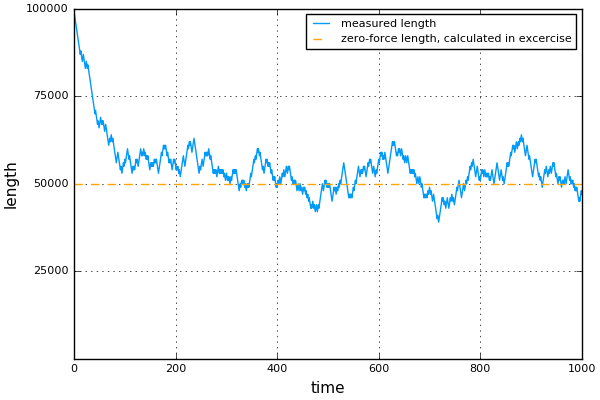

In [12]:
using Plots;
plot(times,results,ylim=(N*a,N*b),lab="measured length",xlab="time",ylab="length")
plot!(times,x->N/2*(a+b),lab="zero-force length, calculated in excercise",color=:orange,style=:dash)


# Entropy under flipping dynamics


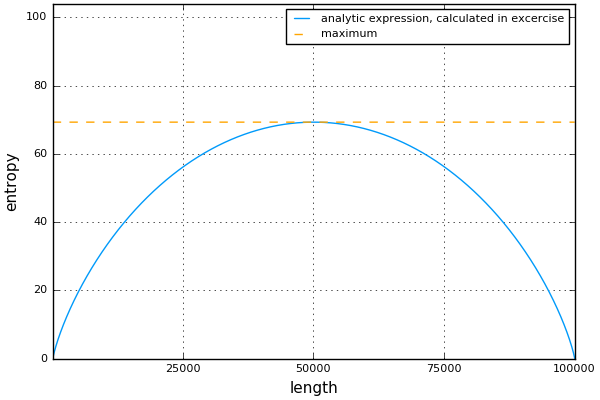

In [14]:
plot(N*a:N*b,S,ylim=(0,1.5*S(N/2*(a+b))),lab="analytic expression, calculated in excercise",xlab="length",ylab="entropy")
plot!(N*a:N*b,x->S(N/2*(a+b)),lab="maximum",color=:orange,style=:dash)


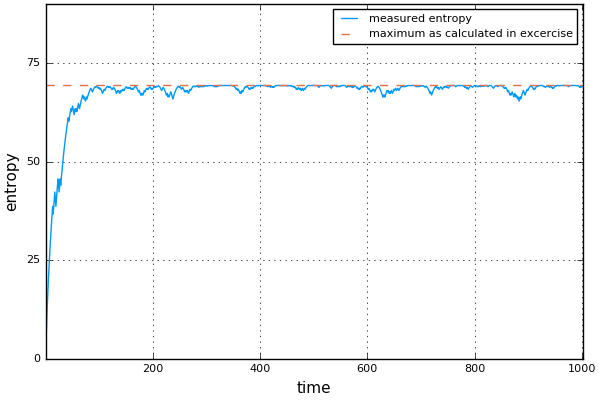

In [15]:
plot(S(results),ylim=(0,90),xlab="time",ylab="entropy",lab="measured entropy")
plot!(1:1001,x->S(N/2*(a+b)),lab="maximum as calculated in excercise",style=:dash)